# 实例11.9-多分类任务-鸢尾花

In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
TRAIN_URL="./iris_training.csv"
train_path = tf.keras.utils.get_file(TRAIN_URL.split("/")[-1],TRAIN_URL)

df_iris_train=pd.read_csv(train_path,header=0)

iris_train=np.array(df_iris_train)

x_train=iris_train[:,2:4]
y_train=iris_train[:,4]

num_train=len(x_train)

x0_train=np.ones(num_train).reshape(-1,1)
X_train=tf.cast(tf.concat([x0_train,x_train],axis=1),tf.float32)
Y_train=tf.one_hot(tf.constant(y_train,dtype=tf.int32),3)

In [8]:
learn_rate=0.2
iter=500
display_step=100

np.random.seed(612)
W=tf.Variable(np.random.randn(3,3),dtype=tf.float32)

In [9]:
ce=[]
acc=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        PRED_train=tf.nn.softmax(tf.matmul(X_train,W))
        Loss_train=-tf.reduce_sum(Y_train*tf.math.log(PRED_train))/num_train

    accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(PRED_train.numpy(),axis=1),y_train),tf.float32))
    
    ce.append(accuracy)
    acc.append(Loss_train)
    
    dL_dW=tape.gradient(Loss_train,W)
    W.assign_sub(learn_rate*dL_dW)
    
    if i%display_step==0:
        print("i: %i, Acc: %f, Loss: %f"%(i,accuracy,Loss_train))

i: 0, Acc: 0.350000, Loss: 4.510763
i: 100, Acc: 0.808333, Loss: 0.503537
i: 200, Acc: 0.883333, Loss: 0.402912
i: 300, Acc: 0.891667, Loss: 0.352650
i: 400, Acc: 0.941667, Loss: 0.319778
i: 500, Acc: 0.941667, Loss: 0.295599


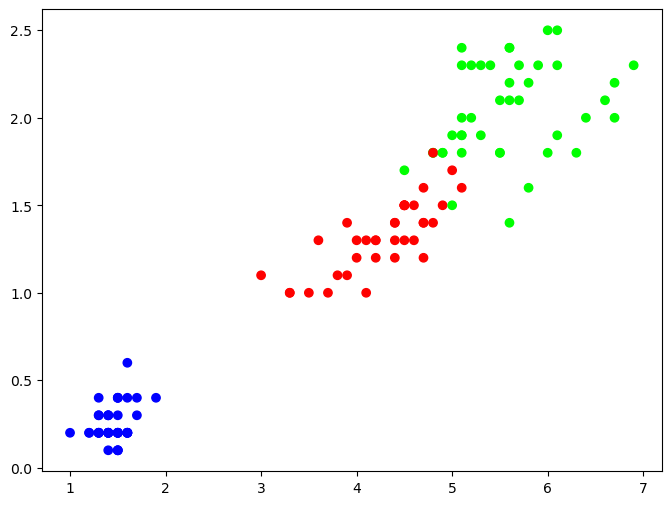

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap="brg")
plt.show()